# App param scan gamma dist figure

Changing `b` and `mu`

In [6]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import pandas as pd

import seaborn as sns

from math import log, floor

import numpy as np
import matplotlib.pyplot as plt

import itertools


from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
from poly2.config import Config, ConfigMixture, get_asymptote_config

In [10]:
cf = Config(
    verbose=False, 
    n_k=300,
)

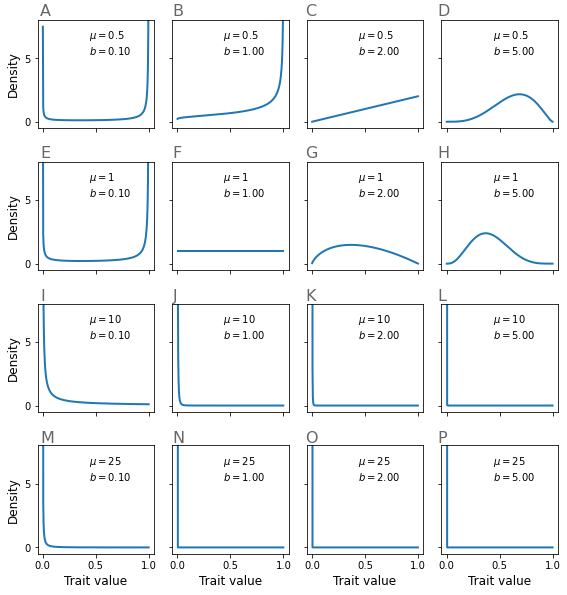

In [51]:
f, ax = plt.subplots(
    4,
    4, 
    figsize=(8,9)
)

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

tv = trait_vec(cf.n_k)

bs = [0.1, 1, 2, 5]
mus = [0.5, 1, 10, 25]

for ii, (mu, b) in enumerate(itertools.product(mus, bs)):
    
    rr = floor(ii/4)
    cc = ii%4

    a = mu*b
    yy = gamma_dist(cf.n_k, a, b)
    
    yy = yy/np.sum(yy)
    
    yy = yy / (tv[1] - tv[0])
    
    ax[rr][cc].plot(tv, yy, lw=2, label=r'$\mu=$' + f'{mu}' + '\n' + r'$b=$' + f'{b:.2f}')
    ax[rr][cc].set_ylim([-5, 310])

f.patch.set_facecolor('white')

ax[3][0].set_xlabel('Trait value')
ax[3][1].set_xlabel('Trait value')
ax[3][2].set_xlabel('Trait value')
ax[3][3].set_xlabel('Trait value')

ax[0][0].set_ylabel('Density')
ax[1][0].set_ylabel('Density')
ax[2][0].set_ylabel('Density')
ax[3][0].set_ylabel('Density')




    
for ii, jj in itertools.product(range(4), range(4)):
    
    legend = ax[ii][jj].legend(frameon=False, loc='upper center')
    
    for label in legend.get_lines(): 
        label.set_linewidth(0.0)
        label.set
    
    ax[ii][jj].set_ylim([-0.5, 8])
    ax[ii][jj].set_yticks([0, 5])
    
    if ii<3:
        ax[ii][jj].set_xticklabels([])
    
    if jj>0:
        ax[ii][jj].set_yticklabels([])
        



plt.tight_layout(rect=[0,0,1,0.91], h_pad=3)

get_corner_annotations(4, 4, 0.07, 0.895, 0.23, 0.22, plt)

# f

## Save

In [54]:
f.savefig('../figures/paper/app3_g_fig2.jpg', dpi=300, bbox_inches="tight")